In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('Uber.csv')
df.drop(labels=['id','timestamp','Unnamed: 0'],axis=1 , inplace=True)

In [3]:
df.isnull().sum()

hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1112
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   1
precipProbability                 1
humidity                          1
windSpeed                         1
windGust                          1
windGustTime                      1
visibility                        1
temperatureHigh                   1
temperatureHighTime         

In [4]:
df[df.duplicated()]

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
6440,13,28,11,2018-11-28 13:50:08,America/New_York,Financial District,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
7128,0,27,11,2018-11-27 00:14:29,America/New_York,Haymarket Square,Theatre District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.1225,1.543252e+09,40.45,1.543234e+09,46.49,1.543255e+09,37.17,1.543291e+09,43.84,1.543244e+09


In [5]:
df.drop_duplicates()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0003,1.543594e+09,28.79,1.543579e+09,42.52,1.543601e+09,26.41,1.543576e+09,40.53,1.543612e+09
1,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.0001,1.544717e+09,18.29,1.544688e+09,33.83,1.544731e+09,13.79,1.544688e+09,32.85,1.544735e+09
2,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0001,1.544717e+09,18.29,1.544688e+09,33.83,1.544731e+09,13.79,1.544688e+09,32.85,1.544735e+09
3,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.1252,1.544980e+09,39.22,1.544954e+09,43.83,1.544990e+09,33.98,1.545019e+09,38.38,1.544987e+09
4,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0001,1.544717e+09,18.29,1.544688e+09,33.83,1.544731e+09,13.79,1.544688e+09,32.85,1.544735e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,4,4,12,2018-12-04 04:43:00,America/New_York,Theatre District,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0004,1.543853e+09,43.10,1.543896e+09,56.89,1.543853e+09,40.05,1.543896e+09,56.22,1.543853e+09
7802,3,18,12,2018-12-18 03:45:10,America/New_York,Theatre District,Haymarket Square,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0175,1.545066e+09,34.14,1.545044e+09,41.44,1.545077e+09,28.12,1.545044e+09,35.95,1.545077e+09
7803,12,2,12,2018-12-02 12:43:02,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0916,1.543770e+09,36.32,1.543727e+09,50.80,1.543788e+09,35.84,1.543748e+09,50.13,1.543788e+09
7804,2,17,12,2018-12-17 02:15:09,America/New_York,Theatre District,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.1266,1.544980e+09,39.29,1.544954e+09,43.76,1.544990e+09,33.73,1.545019e+09,38.30,1.544987e+09


In [6]:
# df = pd.get_dummies(df, drop_first=True)

In [7]:
df['price'].unique()

array([12. , 16. ,  7.5, 26. ,  5.5,  nan,  8.5, 15. , 20.5,  7. , 27.5,
       29.5,  9.5, 22. ,  9. , 16.5, 13. , 17. , 10. , 34. , 18.5, 11. ,
       36. , 25. , 32.5, 27. , 35. ,  8. , 13.5, 23.5, 14. , 26.5, 19.5,
       38.5, 23. , 30.5, 10.5, 17.5, 36.5, 12.5, 33.5, 21.5, 18. , 33. ,
       32. ,  6.5, 11.5, 31.5, 28.5, 24. , 29. , 31. , 41. , 38. , 19. ,
       15.5, 21. , 28. , 37.5, 14.5, 22.5,  4.5, 40.5, 42. , 46.5, 50.5,
       24.5, 41.5, 56. , 25.5, 39. , 20. , 30. , 39.5,  6. , 35.5, 48.5,
       37. , 45. , 42.5, 44. , 34.5, 46. , 48. , 47. , 54. , 52. , 62. ,
       55. , 43. , 43.5, 51.5])

In [8]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [9]:
# df['price']= np.where((df['price'].isnull())  ,  df['price'] , np.median(df['price']))

In [10]:
df.isnull().sum()

hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1112
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   1
precipProbability                 1
humidity                          1
windSpeed                         1
windGust                          1
windGustTime                      1
visibility                        1
temperatureHigh                   1
temperatureHighTime         

In [11]:
## now we will handle missing values using SIMPLE IMPUTER
## automate the whole process using pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder ,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)
numerical_cols = df.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')
Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperature

In [13]:
df.isnull().sum()


hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1112
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   1
precipProbability                 1
humidity                          1
windSpeed                         1
windGust                          1
windGustTime                      1
visibility                        1
temperatureHigh                   1
temperatureHighTime         

In [14]:
df['price'] = np.where( df['price'].isnull() , df['price'].median() , df['price'])

In [15]:
df.isnull().sum()

hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                1
precipProbability              1
humidity                       1
windSpeed                      1
windGust                       1
windGustTime                   1
visibility                     1
temperatureHigh                1
temperatureHighTime            1
temperatureLow                 1
temperatureLowTime             1
apparentTe

In [16]:
df.shape

(7806, 55)

In [17]:
df.dropna()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0003,1.543594e+09,28.79,1.543579e+09,42.52,1.543601e+09,26.41,1.543576e+09,40.53,1.543612e+09
1,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.0001,1.544717e+09,18.29,1.544688e+09,33.83,1.544731e+09,13.79,1.544688e+09,32.85,1.544735e+09
2,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0001,1.544717e+09,18.29,1.544688e+09,33.83,1.544731e+09,13.79,1.544688e+09,32.85,1.544735e+09
3,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.1252,1.544980e+09,39.22,1.544954e+09,43.83,1.544990e+09,33.98,1.545019e+09,38.38,1.544987e+09
4,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0001,1.544717e+09,18.29,1.544688e+09,33.83,1.544731e+09,13.79,1.544688e+09,32.85,1.544735e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,18,18,12,2018-12-18 18:20:03,America/New_York,Theatre District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0.0028,1.545152e+09,23.09,1.545192e+09,38.03,1.545109e+09,11.82,1.545134e+09,31.92,1.545109e+09
7801,4,4,12,2018-12-04 04:43:00,America/New_York,Theatre District,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.0004,1.543853e+09,43.10,1.543896e+09,56.89,1.543853e+09,40.05,1.543896e+09,56.22,1.543853e+09
7802,3,18,12,2018-12-18 03:45:10,America/New_York,Theatre District,Haymarket Square,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0.0175,1.545066e+09,34.14,1.545044e+09,41.44,1.545077e+09,28.12,1.545044e+09,35.95,1.545077e+09
7803,12,2,12,2018-12-02 12:43:02,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.0916,1.543770e+09,36.32,1.543727e+09,50.80,1.543788e+09,35.84,1.543748e+09,50.13,1.543788e+09


In [18]:
df.shape

(7806, 55)

In [19]:
categorical_features

['datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


In [22]:
label = LabelEncoder()
df['datetime'] = label.fit_transform(df['datetime'])
df['timezone'] = label.fit_transform(df['timezone'])
df['source'] = label.fit_transform(df['source'])
df['destination'] = label.fit_transform(df['destination'])
df['cab_type'] = label.fit_transform(df['cab_type'])
df['product_id'] = label.fit_transform(df['product_id'])
df['name'] = label.fit_transform(df['name'])
df['short_summary'] = label.fit_transform(df['short_summary'])
df['long_summary']= label.fit_transform(df['long_summary'])
df['icon'] = label.fit_transform(df['icon'])

In [23]:
df['icon']=df['icon'].astype('int')
df['datetime']=df['datetime'].astype('int')
df['timezone']=df['timezone'].astype('int')
df['source']=df['source'].astype('int')
df['destination']=df['destination'].astype('int')
df['cab_type']=df['cab_type'].astype('int')
df['product_id']=df['product_id'].astype('int')
df['name']=df['name'].astype('int')
df['short_summary']=df['short_summary'].astype('int')
df['long_summary']=df['long_summary'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hour                         7806 non-null   int64  
 1   day                          7806 non-null   int64  
 2   month                        7806 non-null   int64  
 3   datetime                     7806 non-null   int64  
 4   timezone                     7806 non-null   int64  
 5   source                       7806 non-null   int64  
 6   destination                  7806 non-null   int64  
 7   cab_type                     7806 non-null   int64  
 8   product_id                   7806 non-null   int64  
 9   name                         7806 non-null   int64  
 10  price                        7806 non-null   float64
 11  distance                     7806 non-null   float64
 12  surge_multiplier             7806 non-null   float64
 13  latitude          

In [25]:
df= df.dropna()

In [26]:
df.isnull().sum()

hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTe

Missing values are handled now first price will be predicted using supervised algorithm after that booking area using unsupervised algorithm

In [27]:
X= df.drop(labels='price',axis=1)


In [28]:
y= df['price']

In [29]:
scaler= StandardScaler()

X_scaled =scaler.fit_transform(X)

In [30]:
X_scaled

array([[ 1.48627174,  1.21668964, -1.18012875, ..., -0.67754128,
        -0.20321732, -0.62210178],
       [-0.23542333, -0.48498809,  0.84736517, ...,  0.94612245,
        -1.30639517,  1.00711667],
       [ 1.05584797, -0.48498809,  0.84736517, ...,  0.94612245,
        -1.30639517,  1.00711667],
       ...,
       [-1.23974545,  0.01550536,  0.84736517, ...,  1.46632539,
        -0.86110203,  1.5031928 ],
       [ 0.05152585, -1.58607368,  0.84736517, ..., -0.42532168,
         1.17575499, -0.36623093],
       [-1.38322004, -0.08459333,  0.84736517, ...,  1.42954337,
        -0.5235411 ,  1.37264645]])

In [31]:
y

0       12.0
1       16.0
2        7.5
3        7.5
4       26.0
        ... 
7800     8.0
7801    12.0
7802    12.5
7803    27.5
7804     8.0
Name: price, Length: 7805, dtype: float64

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=30)

In [69]:
y_test

3021    12.5
372     12.5
4845    26.5
5778     7.5
5938     7.0
        ... 
2773    42.5
4536     7.0
3944    17.5
6330    12.5
7353     8.0
Name: price, Length: 2342, dtype: float64

In [34]:
df_random= RandomForestRegressor(n_estimators=9)

In [35]:
df_random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=9)

In [36]:
df_random.score(X_train,y_train)

0.9882255894760466

In [37]:
y_pred = df_random.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

r2_score(y_test,y_pred)

0.94996363723806

In [66]:
x= pd.DataFrame(y_pred)

In [71]:
x1=pd.DataFrame(y_test)

Price prediction done successfully

In [39]:
# grid_param={
#     'n_estimators':[5,10,15,20,25,50],
#     'max_depth':range(20),
#     'min_samples_leaf':range(10)
# }
# grid_search = GridSearchCV(param_grid= grid_param , estimator= df_random, cv=10 , n_jobs=10, verbose=1)
# grid_search.fit(X_train,y_train)

In [40]:
# grid_search.best_params_

**Implementing unsupervised learnings algo to predict booking area**

In [41]:
x = df.iloc[:,5:6]

In [42]:
x

,source
0,6
1,6
2,6
3,6
4,6
...,...
7800,10
7801,10
7802,10
7803,10


In [43]:
from sklearn.cluster import KMeans

In [44]:
wcss=[]
for i in range(1,15):
    kmean=KMeans(n_clusters=i , init='k-means++', random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

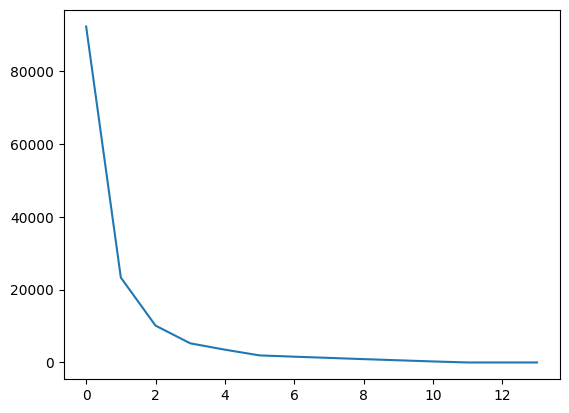

In [45]:
plt.figure()
plt.plot(wcss)

In [46]:
kmean_new= KMeans(n_clusters=8 , init='k-means++', random_state=30)

In [47]:
kmean_new.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 6, 6, ..., 1, 1, 1], dtype=int32)

In [48]:
x['Cluster number']= kmean_new.fit_predict(x)
X=pd.DataFrame(x['Cluster number'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
x

,source,Cluster number
0,6,6
1,6,6
2,6,6
3,6,6
4,6,6
...,...,...
7800,10,1
7801,10,1
7802,10,1
7803,10,1


In [50]:
X

,Cluster number
0,6
1,6
2,6
3,6
4,6
...,...
7800,1
7801,1
7802,1
7803,1


<Axes: xlabel='Cluster number', ylabel='count'>

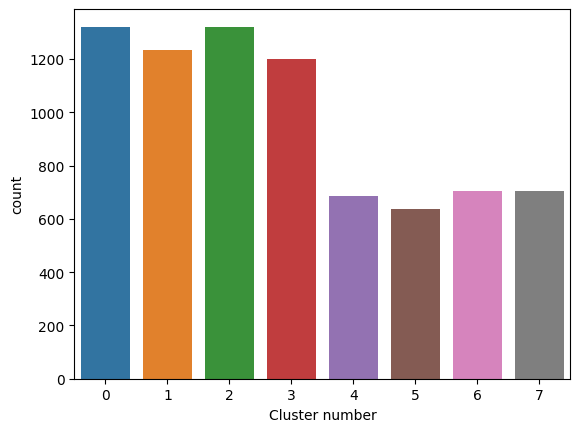

In [60]:
sns.countplot(data=x, x="Cluster number")

In [62]:
X.value_counts()

Cluster number
2                 1321
0                 1320
1                 1233
3                 1199
7                  706
6                  704
4                  685
5                  637
dtype: int64

In [63]:
x.value_counts()

source  Cluster number
3       0                 708
11      7                 706
6       6                 704
4       4                 685
8       2                 673
0       3                 671
10      1                 669
7       2                 648
5       5                 637
2       0                 612
9       1                 564
1       3                 528
dtype: int64

source number 7 or 8 belongs to same cluster no. 2 so they cab be termed as high booking areas.**bold text** **bold text**

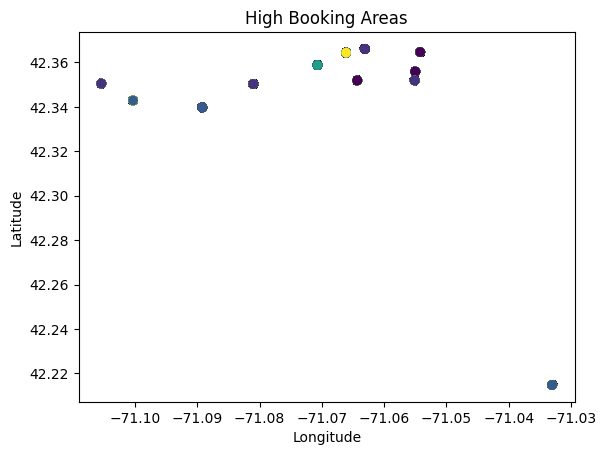

In [77]:
# Plotting the clusters on a map
plt.scatter(df['longitude'], df['latitude'], c=X["Cluster number"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('High Booking Areas')
plt.show()